Code to generate some thesis figures

###

### Small diagrams to put in the introduction or methods

In [126]:
import pandas as pd
import seaborn as sns
import sspa
import scipy
import numpy as np
import networkx as nx

In [5]:
#Load the common cases dataset
df = pd.read_csv('Data/Su_COVID_metabolomics_processed_commoncases.csv', index_col=0)
df


,1372,16610,72665,27823,30915,37373,16831,545959,17050,16359,...,133693,133694,28036,28238,76341,89312,17861,89188,WHO_status,Group
sample_id,,,,,,,,,,,,,,,,,,,,,
INCOV001,-0.342522,-0.830841,-0.703451,-0.451278,0.153207,-0.443252,-0.228725,0.501998,-0.861886,-0.344155,...,-0.465505,0.055753,-0.225622,0.400398,0.163210,1.579262,-0.162221,-0.603790,3-4,COVID19
INCOV002,-0.125585,-1.002246,0.399273,-0.828341,-0.980576,0.373921,-1.076979,-0.131876,-0.869093,-0.467326,...,0.509336,0.627269,0.321718,-0.158514,0.001469,-1.051485,1.299330,0.578560,5-7,COVID19
INCOV003,-0.859326,-0.409159,3.573100,-0.546783,-0.993647,1.547649,0.370131,-0.020399,-0.703786,-0.015627,...,2.056610,1.717149,-0.297723,-1.276891,-0.658288,2.141594,-1.091183,0.447197,5-7,COVID19
INCOV004,-0.562999,-1.560249,-1.269383,-1.437919,0.108734,-0.192066,0.161591,-0.586759,-1.457246,-0.500612,...,0.793065,-0.033125,-0.366082,-0.642671,1.724436,2.074193,-1.021184,-0.410849,3-4,COVID19
INCOV005,-0.741957,0.387909,-0.711036,-0.711515,0.670720,0.610591,-0.322241,-0.793451,-1.230681,-0.246493,...,-0.184967,-0.469553,-0.293869,0.558366,-0.390308,-0.455737,-0.535223,-0.847727,3-4,COVID19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
INCOV135,-2.075777,-0.485936,-0.671225,0.069483,0.042579,0.357250,-0.505272,-0.378441,-0.444915,-0.368108,...,-0.516557,-0.392716,-0.328170,1.013774,-0.391566,-0.407585,1.041224,-0.866190,1-2,COVID19
INCOV136,-0.174602,1.167644,0.055499,0.113342,-0.663851,0.799367,0.004697,0.748894,1.328753,0.391221,...,-0.741578,-0.730981,-0.380517,-1.251641,0.389163,-0.603048,0.941619,-0.511694,3-4,COVID19
INCOV137,0.274900,-0.014841,-0.928512,0.885263,-1.591862,0.230250,0.057818,-0.775962,-0.179700,-0.534786,...,-1.306132,-1.246428,1.763824,1.258387,0.448359,-0.508931,0.268474,-0.997206,5-7,COVID19


Text(815.5555555555554, 0.5, '')

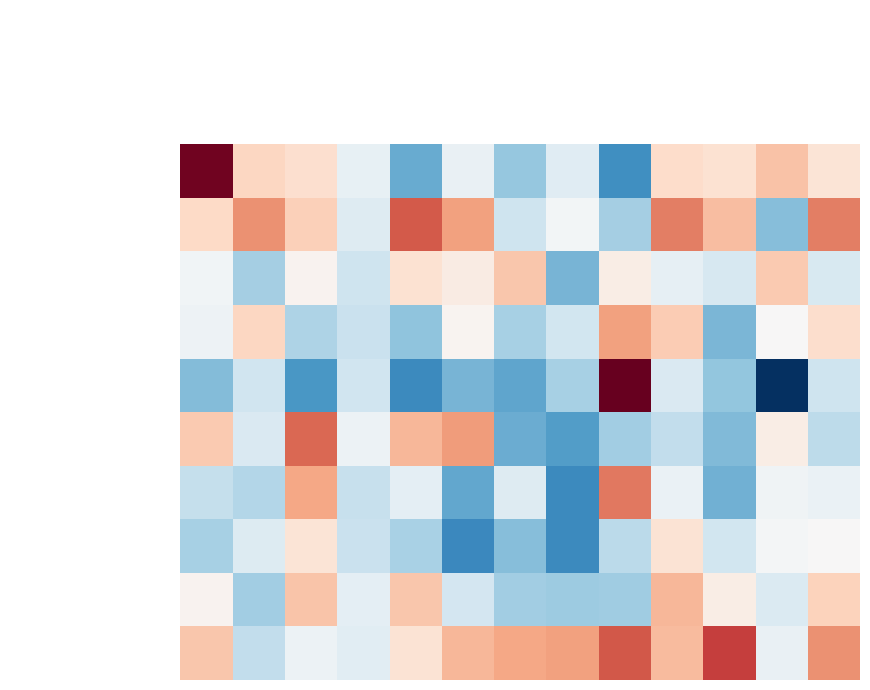

In [123]:
df_sample = df.iloc[35:45,45:58] #13 metabolites long

g = sns.clustermap(df_sample,row_cluster=False,col_cluster=False,xticklabels=False, yticklabels=False,cmap='RdBu_r',figsize=(9,7),cbar=False)
g.ax_heatmap.tick_params(right=False)
g.cax.set_visible(False)
ax = g.ax_heatmap
ax.set_ylabel("")

Text(815.5555555555554, 0.5, '')

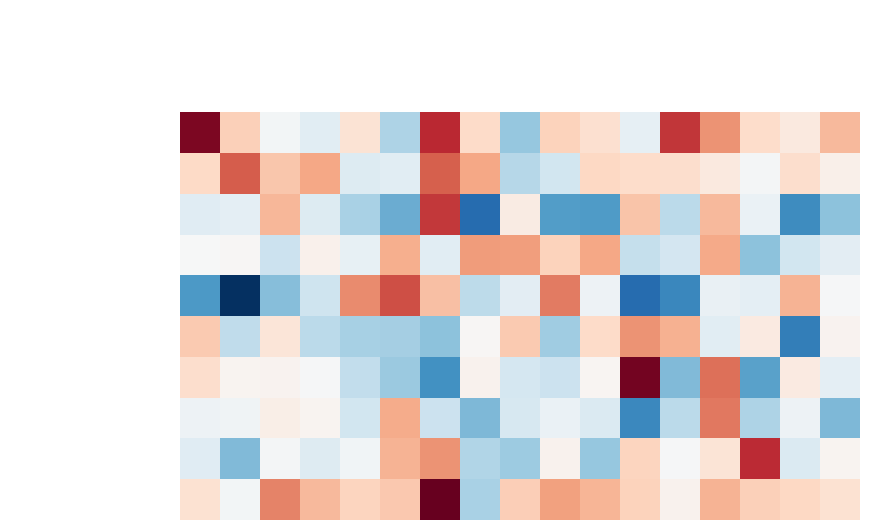

In [62]:
#df_sample = df.iloc[20:30,30:45] #15 proteins long
df_sample = df.iloc[35:45,80:97]

g = sns.clustermap(df_sample,row_cluster=False,col_cluster=False,xticklabels=False, yticklabels=False,cmap='RdBu_r',figsize=(9,5.4),cbar=False)
g.ax_heatmap.tick_params(right=False)
g.cax.set_visible(False)
ax = g.ax_heatmap
ax.set_ylabel("")

In [65]:
reactome_pathways = sspa.process_gmt("Data/Reactome_Homo_sapiens_pathways_compounds_R84.gmt")
kpca_scores = sspa.sspa_kpca(df.iloc[:,:-2], reactome_pathways)
#Convert pathway ID to name
root_path = pd.read_excel('Data/Root_pathways.xlsx', header=None)
root_pathway_dict = {root_path[0][i]:root_path[1][i] for i in range(0,len(root_path))}

root_pathway_names = list(root_pathway_dict.keys())
#Using Sara's code, remove root pathways
kpca_scores = kpca_scores.drop(columns = list(set(root_pathway_names) & set(kpca_scores.columns)))

In [67]:
kpca_scores

,R-HSA-110331,R-HSA-112310,R-HSA-112311,R-HSA-112315,R-HSA-1237112,R-HSA-1368082,R-HSA-1368108,R-HSA-1428517,R-HSA-1483148,R-HSA-1483206,...,R-HSA-9707564,R-HSA-9707616,R-HSA-9711123,R-HSA-9717189,R-HSA-9717207,R-HSA-9734207,R-HSA-9735804,R-HSA-9749641,R-HSA-9753281,R-HSA-975634
sample_id,,,,,,,,,,,,,,,,,,,,,
INCOV001,-0.376183,0.023789,0.470185,-0.028633,-0.230591,-0.156796,-0.156796,-0.164922,0.298052,-0.371426,...,-0.156796,-0.156796,-0.156796,0.251727,-0.374152,-0.417449,0.039264,-0.463495,-0.320570,-0.156796
INCOV002,-0.311560,-0.092256,0.371911,-0.193472,0.380581,0.523125,0.523125,-0.298485,-0.592081,0.238697,...,0.523125,0.523125,0.523125,0.293598,-0.321341,-0.078743,0.004789,0.690230,-0.284524,0.523125
INCOV003,-0.308065,0.016257,0.605379,0.002243,0.196997,0.294189,0.294189,-0.180590,0.036414,-0.202217,...,0.294189,0.294189,0.294189,0.299947,0.319285,0.516905,-0.274521,0.527403,-0.469985,0.294189
INCOV004,0.664277,0.165562,-0.112130,-0.001627,0.063758,0.289325,0.289325,-0.332864,-0.232279,-0.250680,...,0.289325,0.289325,0.289325,0.425024,-0.465348,-0.394084,0.679731,-0.170759,-0.120595,0.289325
INCOV005,0.265643,0.400127,-0.427878,0.285042,0.133373,0.652853,0.652853,0.136137,-0.156159,-0.182578,...,0.652853,0.652853,0.652853,-0.108267,0.220742,-0.187237,0.374706,0.261147,-0.244730,0.652853
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
INCOV135,-0.394520,0.259495,0.025824,0.226963,-0.180511,0.444582,0.444582,0.324441,-0.566872,0.132579,...,0.444582,0.444582,0.444582,-0.511849,0.513085,-0.316599,-0.115509,-0.053170,-0.549767,0.444582
INCOV136,-0.206822,0.033658,0.125002,0.085359,0.674275,-0.663270,-0.663270,0.535411,0.598635,0.125325,...,-0.663270,-0.663270,-0.663270,-0.436924,0.379013,0.524433,-0.306521,-0.285025,-0.554492,-0.663270
INCOV137,-0.342753,0.160082,0.205079,0.211039,0.134428,0.417418,0.417418,-0.580234,-0.375882,0.301830,...,0.417418,0.417418,0.417418,0.294597,-0.321731,0.106948,-0.337870,-0.057217,-0.485134,0.417418


Text(815.5555555555554, 0.5, '')

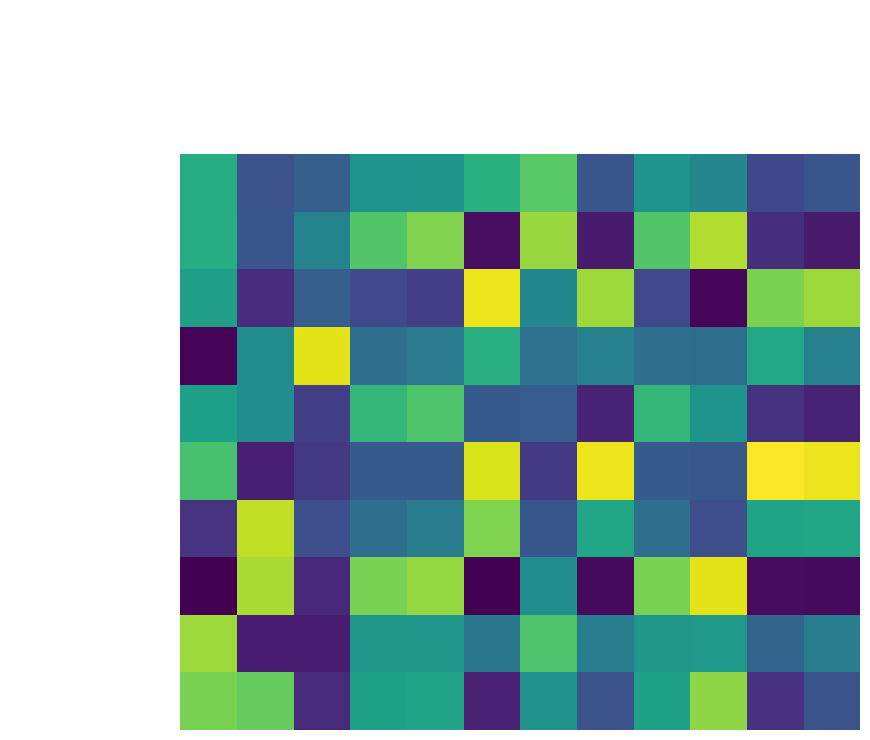

In [83]:
kpca_scores_sample = kpca_scores.iloc[35:45,50:62] #12 metabolite pathways long

g = sns.clustermap(kpca_scores_sample,row_cluster=False,col_cluster=False,xticklabels=False, yticklabels=False,cmap='viridis',figsize=(9,7.5),cbar=False)
g.ax_heatmap.tick_params(right=False)
g.cax.set_visible(False)
ax = g.ax_heatmap
ax.set_ylabel("")

Text(815.5555555555554, 0.5, '')

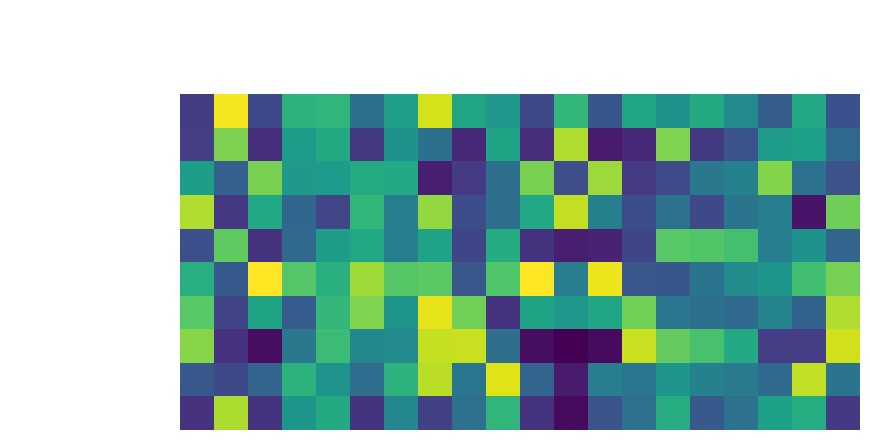

In [90]:
kpca_scores_sample = kpca_scores.iloc[35:45,65:85] #20 protein pathways long

g = sns.clustermap(kpca_scores_sample,row_cluster=False,col_cluster=False,xticklabels=False, yticklabels=False,cmap='viridis',figsize=(9,4.5),cbar=False)
g.ax_heatmap.tick_params(right=False)
g.cax.set_visible(False)
ax = g.ax_heatmap
ax.set_ylabel("")

Text(815.5555555555554, 0.5, '')

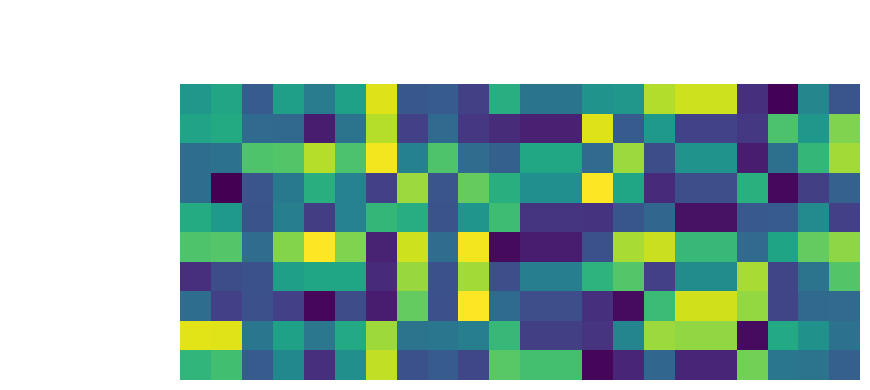

In [122]:
kpca_scores_sample = kpca_scores.iloc[35:45,85:107] #23 protein pathways long

g = sns.clustermap(kpca_scores_sample,row_cluster=False,col_cluster=False,xticklabels=False, yticklabels=False,cmap='viridis',figsize=(9,4),cbar=False)
g.ax_heatmap.tick_params(right=False)
g.cax.set_visible(False)
ax = g.ax_heatmap
ax.set_ylabel("")

In [101]:
spearman_results = scipy.stats.spearmanr(kpca_scores)

spearman_coef = spearman_results[0] #correlation coefficients
spearman_pvals = spearman_results[1] #p-values

spearman_coef = pd.DataFrame(spearman_coef)

Text(815.5555555555554, 0.5, '')

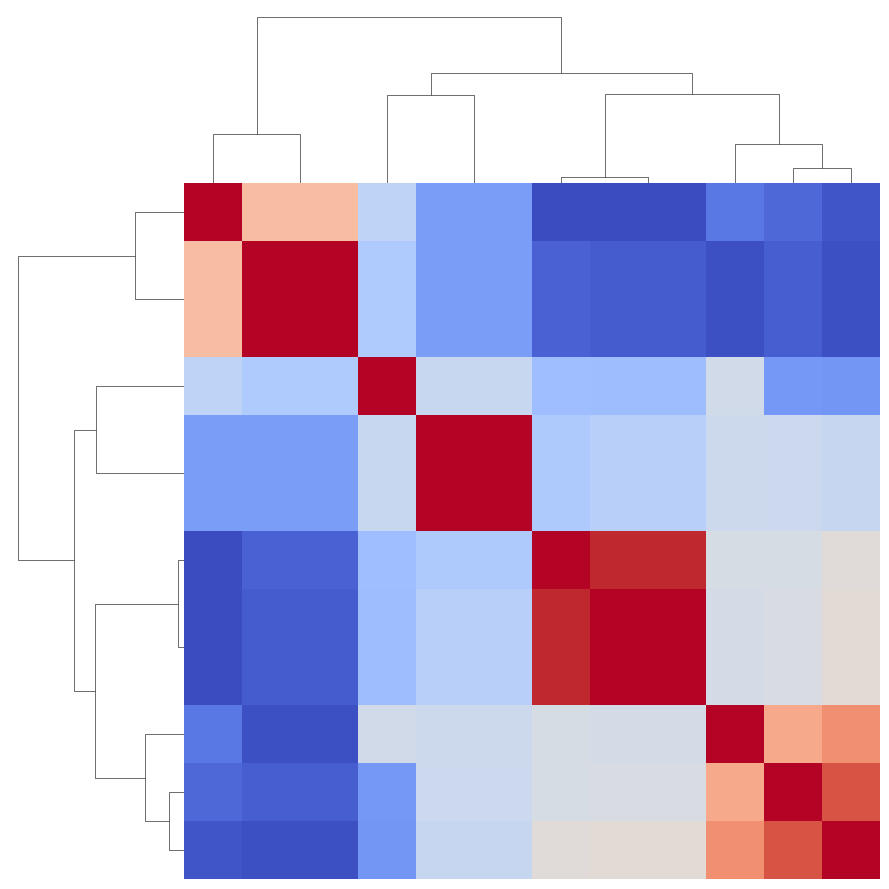

In [120]:
spearman_coef_sample = pd.DataFrame(spearman_coef).iloc[35:47,35:47] #12 pathways for metabolomic

corr= spearman_coef_sample.corr()
matrix = np.triu(corr)

g = sns.clustermap(spearman_coef_sample,row_cluster=True,col_cluster=True,xticklabels=False, yticklabels=False,cmap="coolwarm",figsize=(9,9),cbar=False)#,mask=matrix)
g.ax_heatmap.tick_params(right=False)
g.cax.set_visible(False)
ax = g.ax_heatmap
ax.set_ylabel("")

Text(815.5555555555554, 0.5, '')

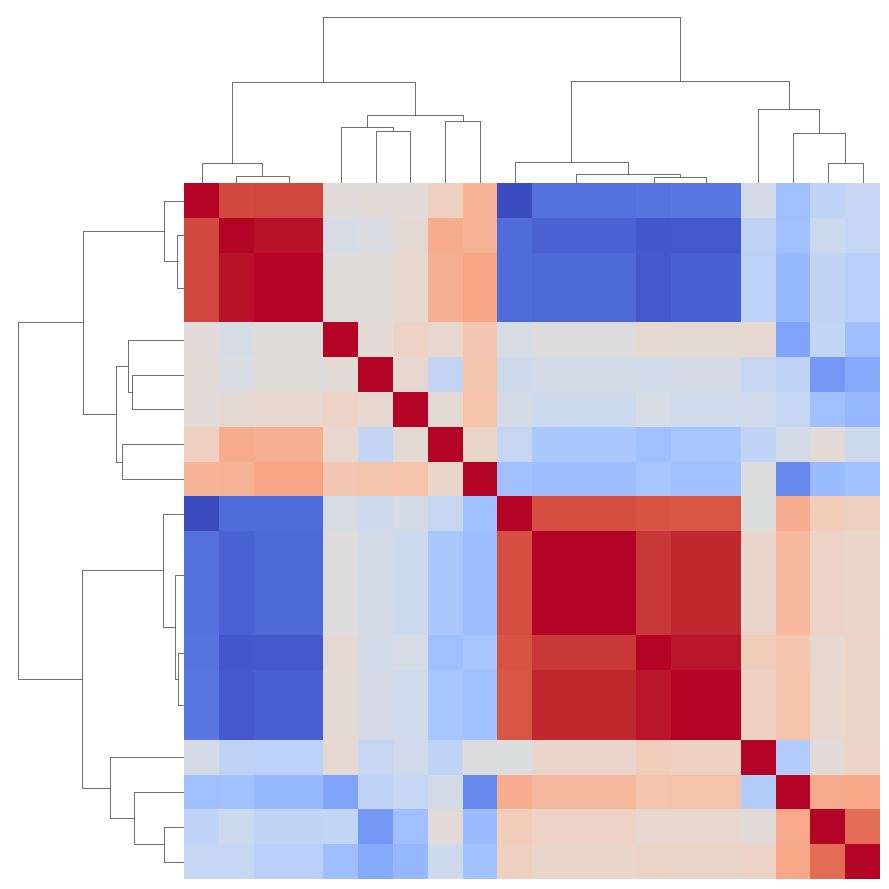

In [119]:
spearman_coef_sample = pd.DataFrame(spearman_coef).iloc[50:70,50:70] #20 pathways for proteomic

corr= spearman_coef_sample.corr()
matrix = np.triu(corr)

g = sns.clustermap(spearman_coef_sample,row_cluster=True,col_cluster=True,xticklabels=False, yticklabels=False,cmap="coolwarm",figsize=(9,9),cbar=False)#,mask=matrix)
g.ax_heatmap.tick_params(right=False)
g.cax.set_visible(False)
ax = g.ax_heatmap
ax.set_ylabel("")

Text(815.5555555555554, 0.5, '')

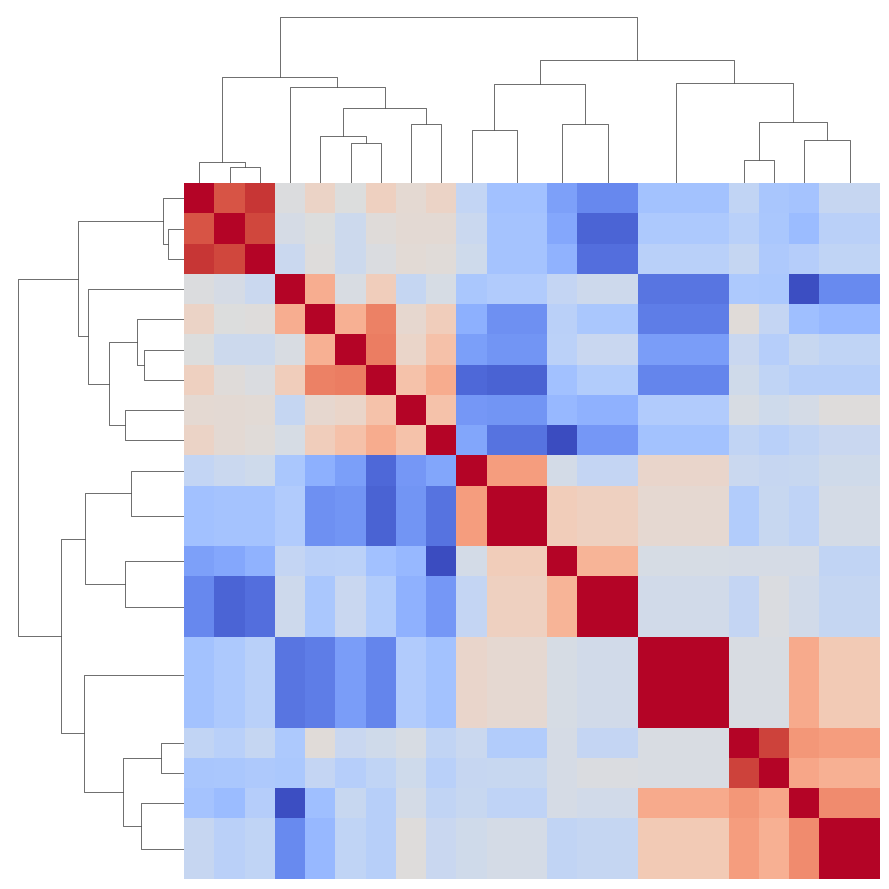

In [124]:
spearman_coef_sample = pd.DataFrame(spearman_coef).iloc[100:123,100:123] #23 pathways for integrated

corr= spearman_coef_sample.corr()
matrix = np.triu(corr)

g = sns.clustermap(spearman_coef_sample,row_cluster=True,col_cluster=True,xticklabels=False, yticklabels=False,cmap="coolwarm",figsize=(9,9),cbar=False)#,mask=matrix)
g.ax_heatmap.tick_params(right=False)
g.cax.set_visible(False)
ax = g.ax_heatmap
ax.set_ylabel("")

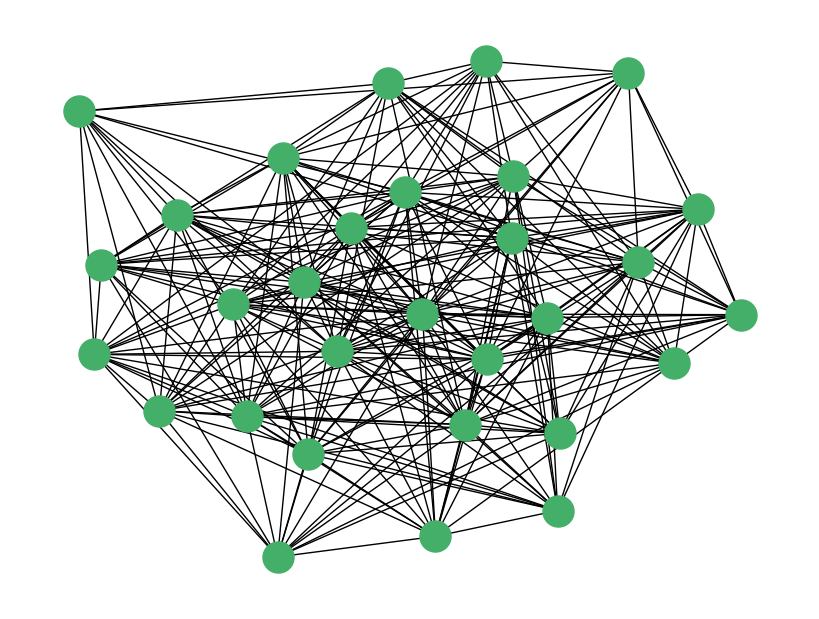

In [154]:
#https://stackoverflow.com/questions/61958360/how-to-create-random-graph-where-each-node-has-at-least-1-edge-using-networkx
import networkx as nx
import random
import matplotlib.pyplot as plt

nodes = 30
seed = random.randint(1,10)
probability = 0.6
G = nx.gnp_random_graph(nodes,probability)

plt.figure(figsize=(8,6))
 
nx.draw(G, node_color='#44AF69',node_size=500)   #F96E46-orange       #00E8FC-blue     #44AF69-green

### Venn diagram to show the number of common pathways between metabolomic, proteomic and integrated

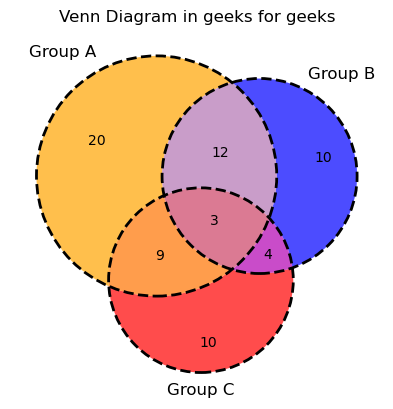

In [1]:
#https://www.geeksforgeeks.org/how-to-create-and-customize-venn-diagrams-in-python/

#import module
from matplotlib_venn import venn3, venn3_circles
from matplotlib import pyplot as plt
  
# depict venn diagram
venn3(subsets=(20, 10, 12, 10, 9, 4, 3), 
      set_labels=('Group A', 'Group B', 'Group C'), 
      set_colors=("orange", "blue", "red"), alpha=0.7)
  
# outline of circle line style and width
venn3_circles(subsets=(20, 10, 12, 10, 9, 4, 3),
              linestyle="dashed", linewidth=2)
  
# title of the venn diagram
plt.title("Venn Diagram in geeks for geeks")
plt.show()

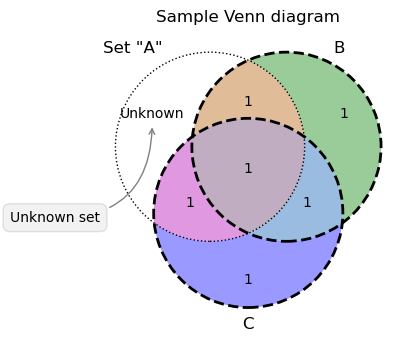

In [86]:
#From matplotlib_venn documentation
from matplotlib import pyplot as plt
import numpy as np
from matplotlib_venn import venn3, venn3_circles
plt.figure(figsize=(4,4))
v = venn3(subsets=(1, 1, 1, 1, 1, 1, 1), set_labels = ('A', 'B', 'C'))
v.get_patch_by_id('100').set_alpha(1.0)
v.get_patch_by_id('100').set_color('white')
v.get_label_by_id('100').set_text('Unknown')
v.get_label_by_id('A').set_text('Set "A"')
c = venn3_circles(subsets=(1, 1, 1, 1, 1, 1, 1), linestyle='dashed')
c[0].set_lw(1.0)
c[0].set_ls('dotted')
plt.title("Sample Venn diagram")
plt.annotate('Unknown set', xy=v.get_label_by_id('100').get_position() - np.array([0, 0.05]), xytext=(-70,-70),
                ha='center', textcoords='offset points', bbox=dict(boxstyle='round,pad=0.5', fc='gray', alpha=0.1),
                arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.5',color='gray'))
plt.show()

c:\Users\jenna\anaconda3\envs\Imperial_Project2\Lib\site-packages\matplotlib_venn\_venn3.py:117: UserWarning: Bad circle positioning
  warnings.warn("Bad circle positioning")


Text(0.5, 1.0, 'Pathway overlap between omics')

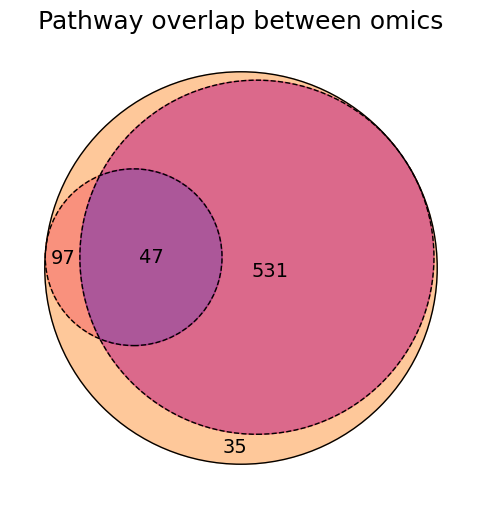

In [148]:
#For WEIGHTED Venn diagram

from matplotlib_venn import venn3, venn3_circles
from matplotlib import pyplot as plt
import numpy as np

plt.figure(figsize=(6, 6))
#Colours are washed out because they're overlapping, so colour by patch instead
#Difficulty knowing which circle is which omic
  
#Draw Venn diagram
vd = venn3(subsets=(0, 0, 0, 35, 97, 531, 47), 
      set_labels=('', '', ''), 
      set_colors=('Red', 'Yellow', 'Blue'),alpha=0.8)   #, alpha=0.1
  
#Circle outline
c = venn3_circles(subsets=(0, 0, 0, 35, 97, 531, 47), linewidth=1)
c[0].set_ls('dashed')
c[1].set_ls('dashed')

#Change patch colour
vd.get_patch_by_id("001").set_color('#febb81')   #big circle
vd.get_patch_by_id("101").set_color('#f8765c')  
vd.get_patch_by_id("011").set_color('#d3436e')   
vd.get_patch_by_id("111").set_color('#982d80')   #most overlap
 
#Move circle number labels 
vd.get_label_by_id("101").set_x(-0.5)   #111,(110),(100),(000),101
vd.get_label_by_id("001").set_x(-0.004)   #111,(110),(100),(000),101,001
vd.get_label_by_id("001").set_y(-0.53)   #111,(110),(100),(000),101,001,(010),011


#Changing font size
for text in vd.set_labels:  #Omic labels
    text.set_fontsize(15)  

for x in range(len(vd.subset_labels)):  #Circle numbers
    if vd.subset_labels[x] is not None:
        vd.subset_labels[x].set_fontsize(14)

#plt.annotate('144 edges',xy=[-0.7,.2])  #doesn't show up past the circle
#plt.annotate('578 edges',xy=[0.4,0.45])
#plt.annotate('710 edges',xy=[-0.4,-0.45])

plt.title("Pathway overlap between omics",fontsize=18)    #'#5f187f', '#982d80', '#d3436e', '#f8765c', '#febb81']

In [101]:
vd.get_label_by_id('001').get_position()

(-0.004, -0.53)

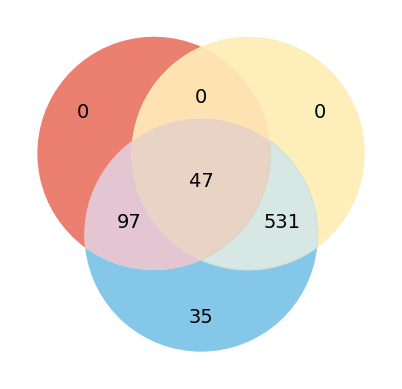

In [213]:
#For UNWEIGHTED Venn diagram

import matplotlib.pyplot as plt
import matplotlib_venn as mv

#Draw venn diagram
vd = mv.venn3_unweighted(subsets=(0, 0, 0, 35, 97, 531, 47), 
      #set_labels=('Metabolomic', 'Proteomic', 'Integrated'), 
      set_labels=('', '', ''), 
      set_colors=( '#e34933', '#fee99d', '#51B0DF'), alpha=0.7)   #        '#e34933', '#fee99d', '#588cc0'/'#51B0DF'

#Change font size
for text in vd.set_labels:  #Omic labels
    text.set_fontsize(16)  

for x in range(len(vd.subset_labels)):  #Circle numbers
    if vd.subset_labels[x] is not None:
        vd.subset_labels[x].set_fontsize(14)

#Change patch colour  
vd.get_patch_by_id("011").set_color('#C7DFD9') 

#Move label a bit
vd.get_label_by_id("011").set_x(0.296)

#plt.title("Pathway overlap between omics",fontsize=18)  

In [126]:
import seaborn as sns
#Obtain hex codes for sns colour palette
#https://www.practicalpythonfordatascience.com/ap_seaborn_palette
print(sns.color_palette("magma").as_hex()[:])  #'Spectral','RdYlBu'
sns.color_palette("magma")

['#221150', '#5f187f', '#982d80', '#d3436e', '#f8765c', '#febb81']


[(0.135053, 0.068391, 0.315),
 (0.372116, 0.092816, 0.499053),
 (0.594508, 0.175701, 0.501241),
 (0.828886, 0.262229, 0.430644),
 (0.973381, 0.46152, 0.361965),
 (0.997341, 0.733545, 0.505167)]

### Venn diagram to show the number of differential edges between metabolomic, proteomic and integrated

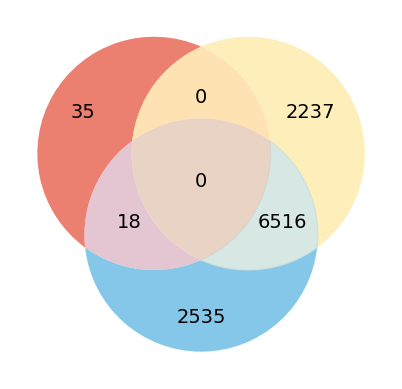

In [210]:
#For UNWEIGHTED Venn diagram

import matplotlib.pyplot as plt
import matplotlib_venn as mv

#Draw venn diagram
vd = mv.venn3_unweighted(subsets=(35, 2237, 0, 2535, 18, 6516, 0), 
      #set_labels=('Metabolomic', 'Proteomic', 'Integrated'), 
      set_labels=('', '', ''), 
      set_colors=( '#e34933', '#fee99d', '#51B0DF'), alpha=0.7)   #        '#e34933', '#fee99d', '#588cc0'

for text in vd.set_labels:  #Omic labels
    text.set_fontsize(16)  

for x in range(len(vd.subset_labels)):  #Circle numbers
    if vd.subset_labels[x] is not None:
        vd.subset_labels[x].set_fontsize(14)


#Change patch colour
vd.get_patch_by_id("011").set_color('#C7DFD9')  

#Move label a bit
vd.get_label_by_id("010").set_x(0.4) 
vd.get_label_by_id("011").set_x(0.296) 

#plt.title("Pathway overlap between omics",fontsize=18)  
